In [1]:
import pandas as pd
from getters.get_data import GetData
import csv

Instanciando objeto e realizando o download dos dados

In [2]:
get = GetData('https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv')
get.get_data()

In [3]:
# Importando os dados para um dataframe
df = pd.read_csv('data/serie_historica.csv', sep=';')

Realizando tratamento dos dados obtidos

In [4]:
df.head()

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"


In [5]:
# Segmentando sexo e raça
# Importante notar que apesar de segmentar a raça, a coluna ainda define o sexo pelo pronome
df['sexo'] = df['sexo_raça'].apply(lambda x: x.split(' ')[0])
df['raca'] = df['sexo_raça'].apply(lambda x: x.split(' ')[1])

In [6]:
# Para realmente desagregar a raça do sexo, é necessário normalizar as categorias para branco x negro
def agrega_raca(valor):

    if 'Branc' in valor:
        return 'Brancx'
        
    return 'Negrx'

In [7]:
df['raca_binaria'] = df['raca'].apply(lambda x: agrega_raca(x))

In [8]:
# Transformando valor liquido em float
df['liquido'] = df['liquido'].apply(lambda x: float(x.replace(',', '.')))

In [9]:
# Limpando colunas não utilizadas
df.drop(columns=['sexo_raça','Unnamed: 0'], inplace=True)

In [10]:
df.head()

,ano,liquido,sexo,raca,raca_binaria
0,1999,6527.2,Homem,Branco,Brancx
1,1999,4768.7,Homem,Negro,Negrx
2,1999,5261.6,Mulher,Branca,Brancx
3,1999,4010.0,Mulher,Negra,Negrx
4,2000,5690.3,Homem,Branco,Brancx


## Análise Exploratória dos dados

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

NameError: name 'ax' is not defined

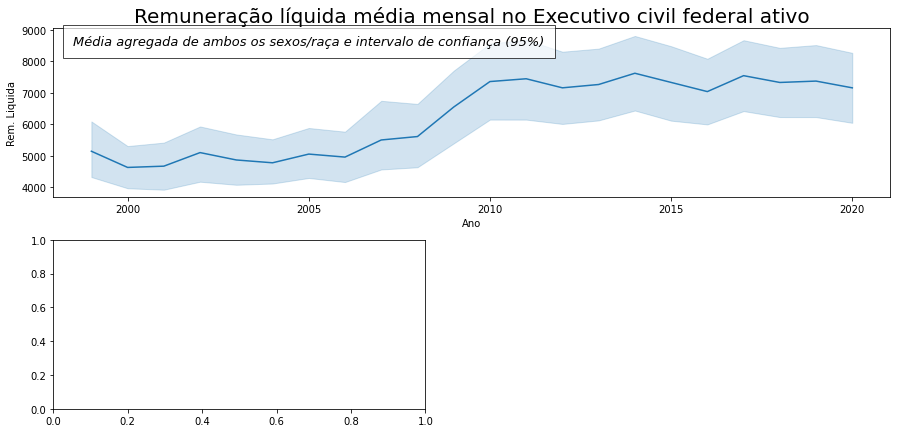

In [12]:
fig = plt.figure(figsize=(15,7))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,2,(1,2)) # two rows, two colums, combined third and fourth cell
sns.lineplot(x="ano", y="liquido", data=df)
plt.ylabel('Rem. Liquida')
plt.xlabel('Ano')
plt.title("Remuneração líquida média mensal no Executivo civil federal ativo", fontsize=20)
plt.text(1998.5,8500,'Média agregada de ambos os sexos/raça e intervalo de confiança (95%)',style='italic',
bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 10}, fontsize=13)


sub1 = fig.add_subplot(2,2,3) # two rows, two columns, fist cell
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
plt.title("Rem. Líq. Média distribuída por sexo", fontsize=20)
plt.set_ylabel('Rem. Líq.')
plt.set_xlabel('Ano')

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,2,4) # two rows, two columns, second cell
plt.annotate('sub2', xy = (0.5, -0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
sub2.plot(x, y)


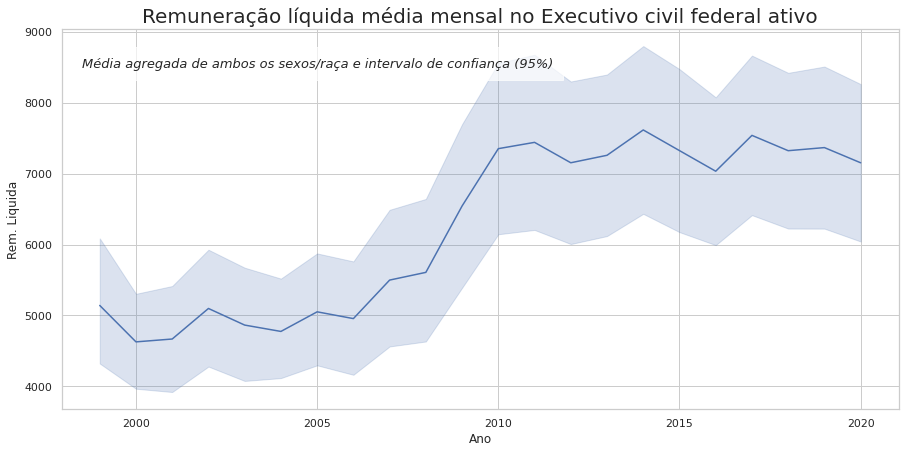

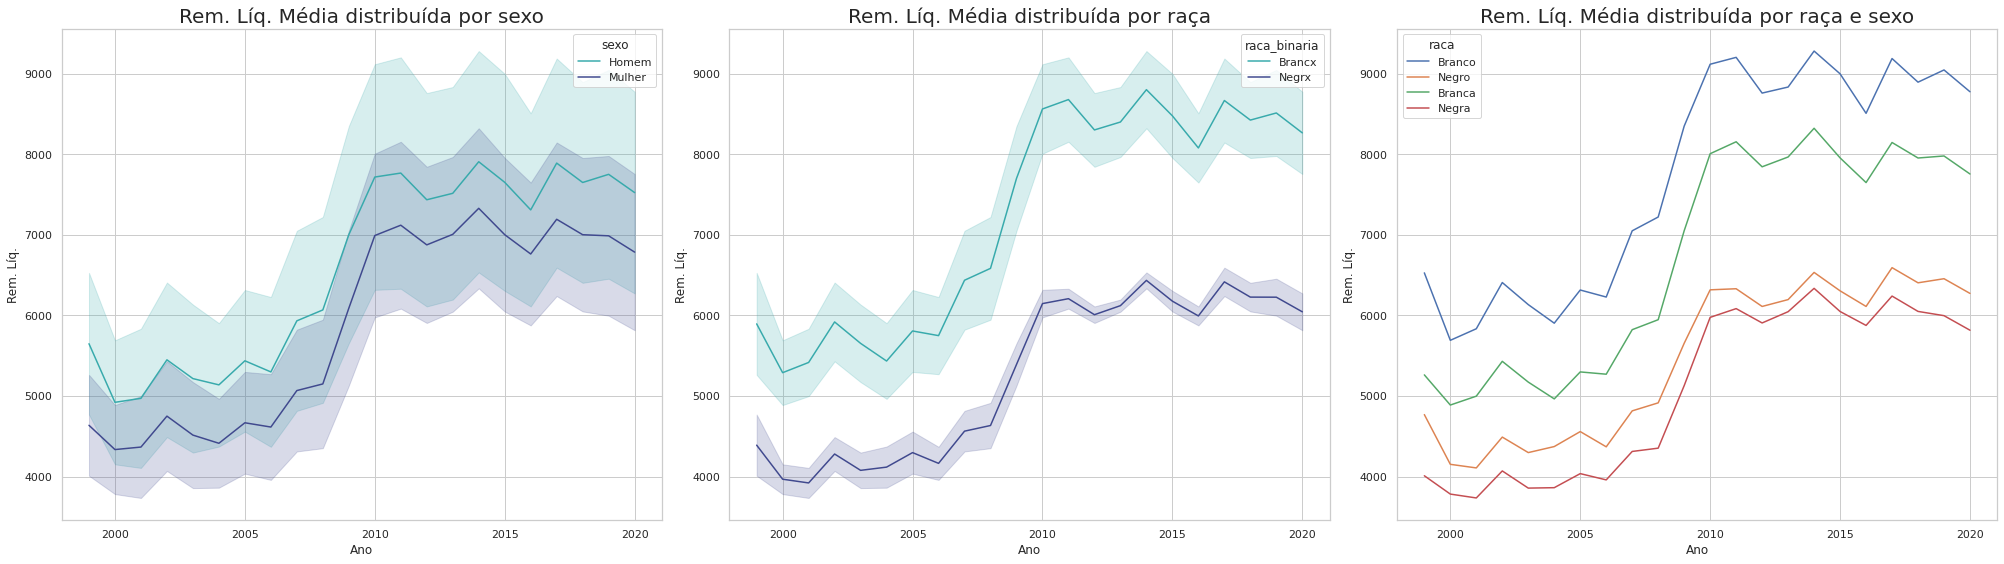

In [50]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
#plotting a series of liquido ano-mes-valor
sns.lineplot(x="ano", y="liquido", data=df)
plt.ylabel('Rem. Liquida')
plt.xlabel('Ano')
plt.title("Remuneração líquida média mensal no Executivo civil federal ativo", fontsize=20)
plt.text(1998.5,8500,'Média agregada de ambos os sexos/raça e intervalo de confiança (95%)',style='italic',
bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 10}, fontsize=13)
plt.show(1)


fig, ax = plt.subplots(1, 3, figsize=(28,8))
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
ax[0].set_title("Rem. Líq. Média distribuída por sexo", fontsize=20)
ax[0].set_ylabel('Rem. Líq.')
ax[0].set_xlabel('Ano')

sns.lineplot(data=df, x="ano", y="liquido", hue="raca_binaria", ax=ax[1], palette=palette)
ax[1].set_title("Rem. Líq. Média distribuída por raça", fontsize=20)
ax[1].set_ylabel('Rem. Líq.')
ax[1].set_xlabel('Ano')


sns.lineplot(data=df, x="ano", y="liquido", hue="raca", ax=ax[2])
ax[2].set_title("Rem. Líq. Média distribuída por raça e sexo", fontsize=20)
ax[2].set_ylabel('Rem. Líq.')
ax[2].set_xlabel('Ano')
fig.tight_layout()
plt.show()

In [13]:
df[['liquido']].describe()

,liquido
count,88.000000
mean,6245.989773
std,1581.514317
min,3734.500000
25%,4989.050000
50%,6097.050000
75%,7674.000000
max,9279.100000


Observando distância na remuneração de Brancos e negros pelo tempo

In [38]:
brancos_x_negros=df.groupby(['ano','raca_binaria'], as_index=False).mean()

In [39]:
brancos_x_negros['diffs'] = brancos_x_negros['liquido'].diff()

In [40]:
mask = brancos_x_negros.ano != brancos_x_negros.ano.shift(1)
brancos_x_negros['diffs'][mask] = np.nan

/tmp/ipykernel_5536/310380331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brancos_x_negros['diffs'][mask] = np.nan


In [41]:
brancos_x_negros=brancos_x_negros.groupby('ano', as_index=False).last()

In [42]:
brancos_x_negros.head()

,ano,raca_binaria,liquido,diffs
0,1999,Negrx,4389.35,-1505.05
1,2000,Negrx,3967.10,-1321.70
2,2001,Negrx,3920.85,-1494.80
3,2002,Negrx,4279.65,-1638.70
4,2003,Negrx,4077.05,-1575.55


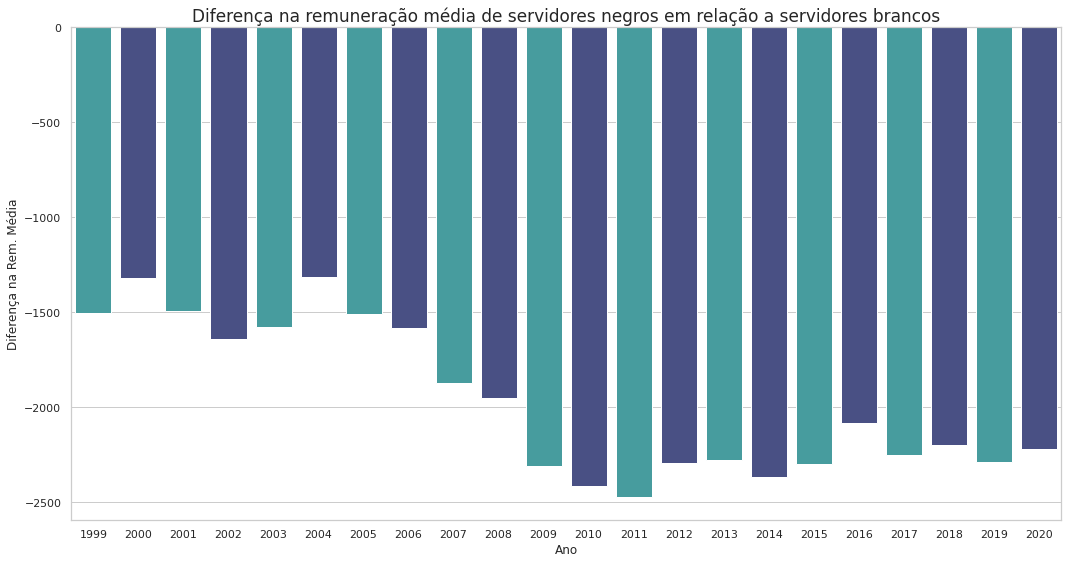

In [65]:
plt.figure(figsize=(15,8))
ax = plt.gca()
palette = sns.color_palette("mako_r", 2)
sns.barplot(data=brancos_x_negros, y='diffs', x='ano', palette=palette)
plt.title('Diferença na remuneração média de servidores negros em relação a servidores brancos', fontsize=17)
#ax.set_ylim([-500,-2500])
plt.xlabel('Ano')
plt.ylabel('Diferença na Rem. Média')
plt.tight_layout()
plt.show()